In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a=pd.read_csv('/content/Cancer_data.csv')
print(a)

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1          3.519683              0     

In [ ]:
a.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [ ]:
a.tail(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0


In [ ]:
a.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [ ]:
x=a.iloc[:,[0,1,2,3,4,5,6,7]].values
y=a.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor=GradientBoostingRegressor()
regressor.fit(x_train, y_train)


GradientBoostingRegressor()

In [ ]:
y_pred=regressor.predict(x_test)

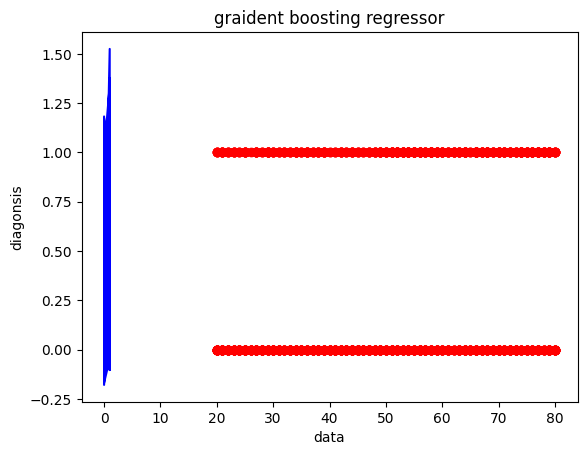

In [ ]:
plt.scatter(x_train[:, 0], y_train,color='red')
plt.plot(x_train[:, 1],regressor.predict(x_train),color='blue')
plt.title("graident boosting regressor")
plt.xlabel("data")
plt.ylabel("diagonsis")
plt.show()

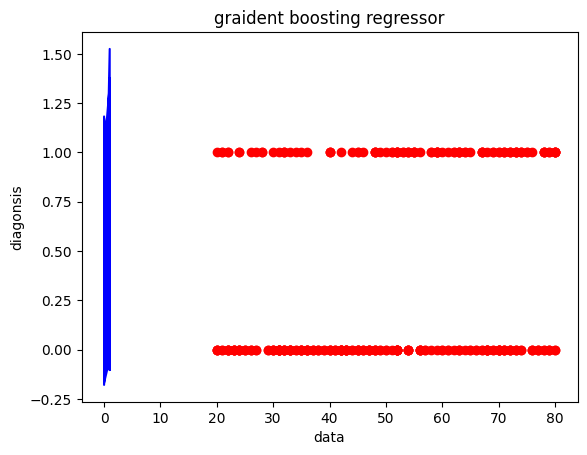

In [ ]:
plt.scatter(x_test[:, 0], y_test,color='red')
plt.plot(x_train[:, 1],regressor.predict(x_train),color='blue')
plt.title("graident boosting regressor")
plt.xlabel("data")
plt.ylabel("diagonsis")
plt.show()

In [ ]:
print("accuarcy",regressor.score(x_test,y_test))

accuarcy 0.6091299582964942


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


0.0889229344875476

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.23173197327087489

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6091299582964942

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

NameError: name 'y_test' is not defined